# Fornax 2022 Demo Plots

Plot spectra from the Fornax 2022 models by
*  Benny T.-H. Tsang, David Vartanyan, and Adam Burrows, [ApJL 937:L15 (2022)](https://doi.org/10.3847/2041-8213/ac8f4b).
* Tianshu Wang, David Vartanyan, Adam Burrows, and Matthew S.B. Coleman, [MNRAS 517:543, 2022](https://doi.org/10.1093/mnras/stac2691).

In [1]:
from read_spec import read_spec, Spectrum
from astropy import units as u

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rc('font', size=14)

## Generator demo

This shows how to loop through a given spectrum file and extract a `Spectrum` object.

In [4]:
for (t, E, F) in read_spec('10.0/nuspec.0.xg'):
    sp = Spectrum(t, E, F)
    if abs(sp.t - 1.0*u.s) < 10*u.ms:
        print(sp)
        break

      0.9905 s
    1.246580 MeV      0.608521 MeV   2.97081e+48 erg / (MeV s)
    2.005150 MeV      0.978819 MeV   1.37859e+49 erg / (MeV s)
    3.225326 MeV      1.574451 MeV    8.8798e+49 erg / (MeV s)
    5.188006 MeV      2.532538 MeV   3.09847e+50 erg / (MeV s)
    8.345016 MeV      4.073641 MeV    5.7184e+50 erg / (MeV s)
   13.423136 MeV      6.552538 MeV   6.13497e+50 erg / (MeV s)
   21.591398 MeV     10.539895 MeV   2.90789e+50 erg / (MeV s)
   34.730221 MeV     16.953644 MeV   5.22232e+49 erg / (MeV s)
   55.864292 MeV     27.270295 MeV   1.81944e+48 erg / (MeV s)
   89.858894 MeV     43.864846 MeV   8.89812e+46 erg / (MeV s)
  144.539932 MeV     70.557531 MeV   3.08231e+45 erg / (MeV s)
  232.495529 MeV    113.493280 MeV   1.24659e+44 erg / (MeV s)



## Plot Spectra between 0 s and 2 s

Loop through the spectra and plot a selection of times between 0 s and 2 s.

In [5]:
def plot_spectra(filename):
    times = np.arange(-0.1, 2, 0.2) * u.s
    colors = plt.cm.magma(np.linspace(0,1,len(times)))
    
    fig, ax = plt.subplots(1,1, figsize=(8,5))

    for (t, E, F) in read_spec(filename):
        sp = Spectrum(t, E, F)
        i = np.where(np.abs(times - sp.t) < 0.5*u.ms)[0]
        if i.size:
            i = i[0]
        else:
            continue

        p = ax.plot(sp.E, sp.F, color=colors[i], alpha=0.7, label=f'{sp.t:.1f}')
        ax.errorbar(sp.E, sp.F, xerr=sp.dE/2, fmt='o', capsize=2, color=p[0].get_color(), alpha=0.4)
        ax.set(yscale='log',
               ylabel='flux [erg MeV$^{-1}$ s$^{-1}$]',
               xlabel='energy [MeV]')

    ax.legend(fontsize=8, loc='best', ncol=3)
    return fig

## $\nu_e$ spectra

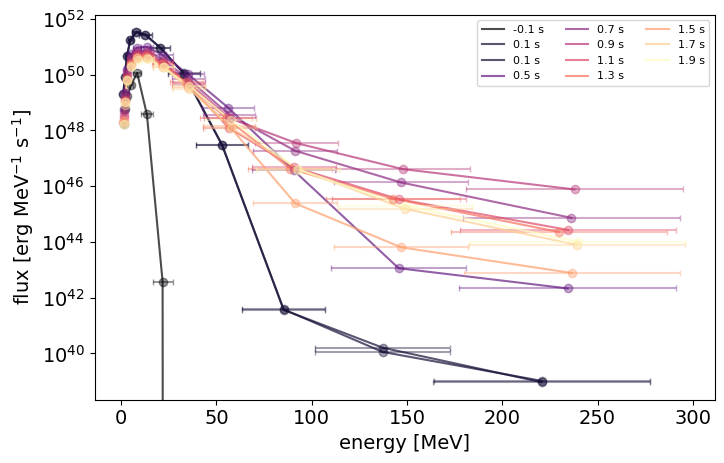

In [6]:
fig = plot_spectra('10.0/nuspec.0.xg')

## $\bar{\nu}_e$ spectra

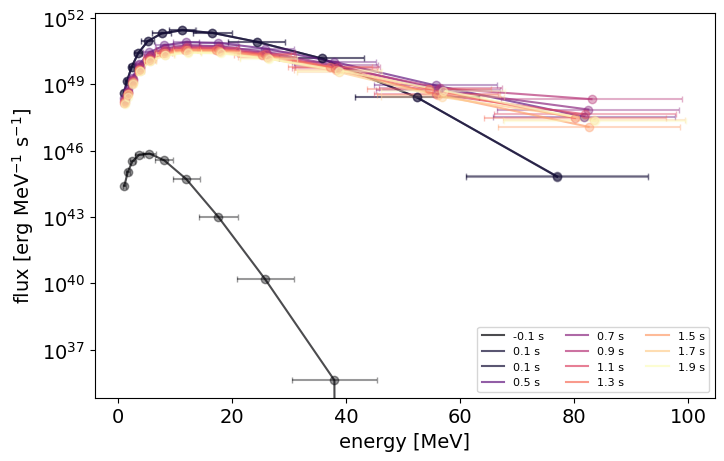

In [7]:
fig = plot_spectra('10.0/nuspec.1.xg')

## $\nu_x$ spectra

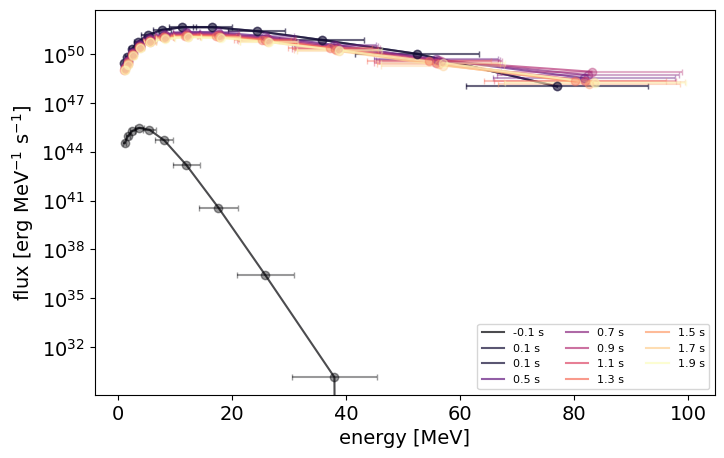

In [8]:
fig = plot_spectra('10.0/nuspec.2.xg')